[*********************100%***********************]  3 of 3 completed


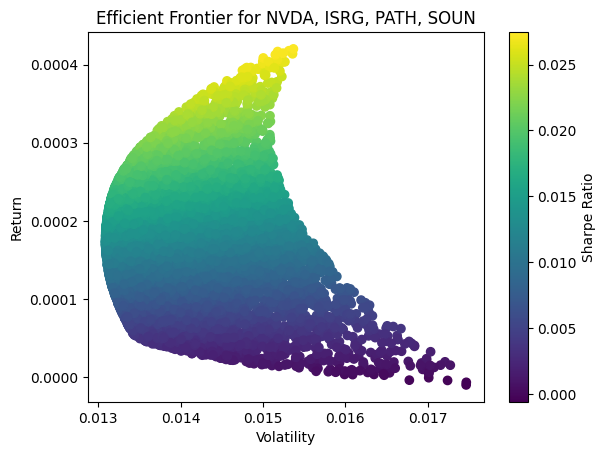

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Function to fetch stock data
def get_stock_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

# Function to calculate portfolio returns, volatility, and covariance matrix
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.dot(weights, mean_returns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, volatility

# Define the list of stock tickers
tickers = ['CSR', 'EPRT', 'ESS']

# Fetch historical stock prices
stock_data = get_stock_data(tickers, start_date='2023-03-05', end_date='2024-03-05')

# Calculate daily returns
daily_returns = stock_data.pct_change()

# Calculate mean returns and covariance matrix
mean_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()

# Number of portfolios to simulate
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    returns, volatility = portfolio_performance(weights, mean_returns, cov_matrix)
    results[0,i] = returns
    results[1,i] = volatility
    # Store Sharpe Ratio (assuming risk-free rate = 0) - Not used for plotting but useful for analysis
    results[2,i] = results[0,i] / results[1,i]

# Plot the efficient frontier
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier for NVDA, ISRG, PATH, SOUN')
plt.show()


In [11]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.optimize import minimize

# Function to fetch stock data
def get_stock_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

# Function to calculate portfolio returns and volatility
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.dot(weights, mean_returns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, volatility

# Optimization function to minimize the difference from the desired point
def minimize_volatility(weights, mean_returns, cov_matrix, desired_return):
    returns, volatility = portfolio_performance(weights, mean_returns, cov_matrix)
    penalty = 1000*abs(returns-desired_return)  # Penalty for not meeting desired return
    return volatility + penalty

# Define the list of stock tickers
tickers = ['CSR', 'EPRT', 'ESS']

# Fetch historical stock prices
stock_data = get_stock_data(tickers, start_date='2023-03-05', end_date='2024-03-05')

# Calculate daily returns
daily_returns = stock_data.pct_change()

# Calculate mean returns and covariance matrix
mean_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()

# Define desired return and volatility
desired_return = 0.0004  # Example: 0.52%
desired_volatility = 0.015  # Example: 2.2%

# Initial guess for weights (equal distribution)
initial_weights = np.array([1/len(tickers)]*len(tickers))

# Constraint that all weights add up to 1 (100% of the portfolio)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds for the weights (between 0 and 1)
bounds = tuple((0, 1) for asset in range(len(tickers)))

# Optimize portfolio to minimize volatility given the desired return
optimized_result = minimize(minimize_volatility, initial_weights, args=(mean_returns, cov_matrix, desired_return), method='SLSQP', bounds=bounds, constraints=constraints)

# The optimal weights for the desired return and volatility
optimal_weights = optimized_result.x

# Print optimal weights with corresponding company names in percentage format
for i, weight in enumerate(optimal_weights):
    print(f"{tickers[i]}: {weight*100:.2f}%")


[*********************100%***********************]  3 of 3 completed
CSR: 0.00%
EPRT: 9.97%
ESS: 90.03%
